In [4]:
from skimage import io, img_as_float, img_as_ubyte
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from scipy import signal
from math import log10
import matplotlib.pyplot as plt
import numpy as np
import json
import math

FileNotFoundError: [Errno 2] No such file or directory: 'data_edge Detection/outputimage_exact Serial [1]_1.npy'

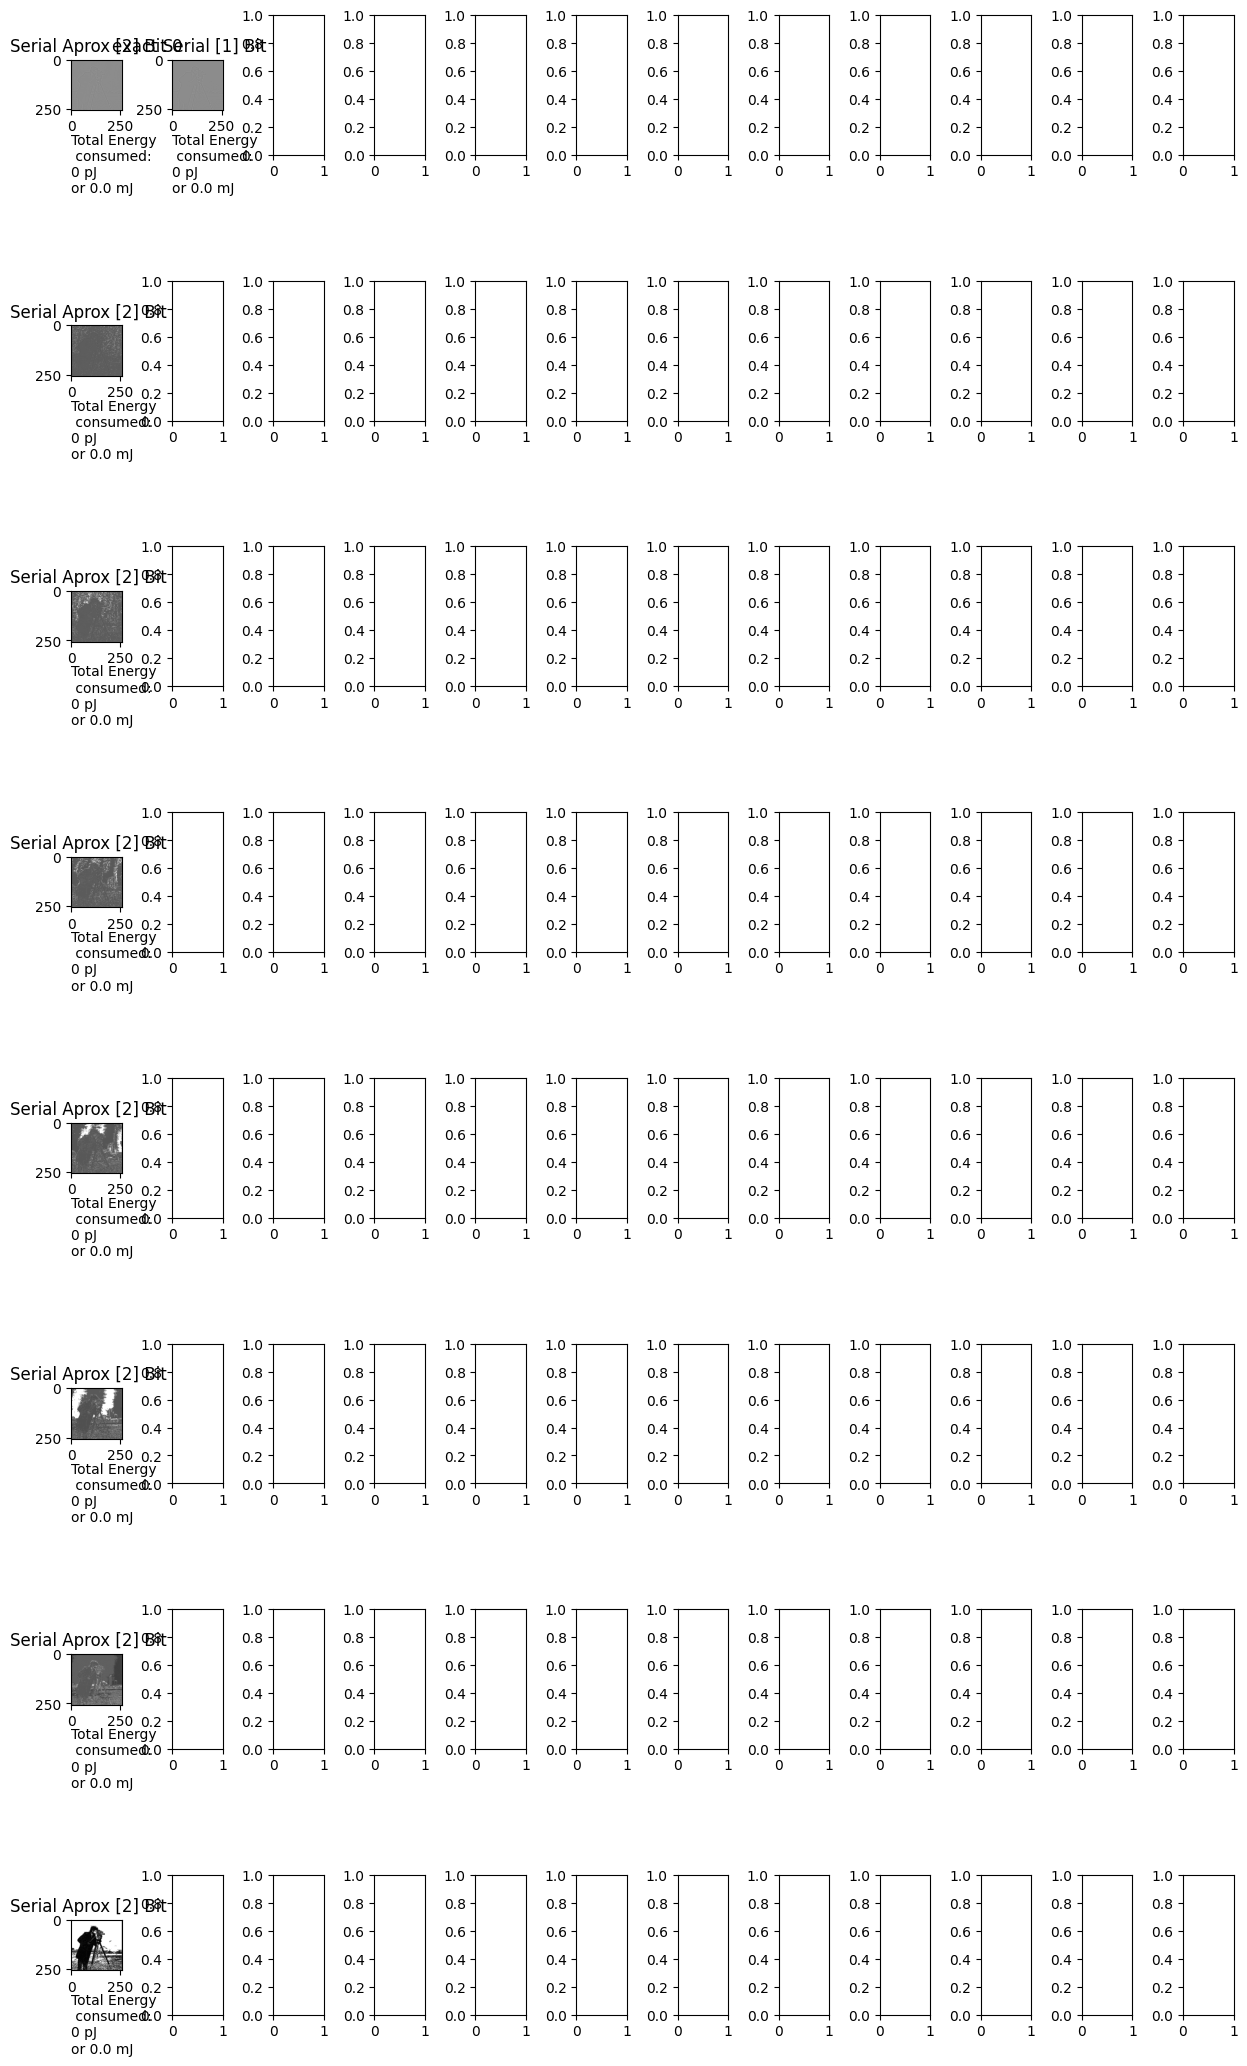

In [12]:
algo_list = ["exact Serial [1]","Serial Aprox [2]", "SIAFA 1 [3]","SIAFA 2 [4]","SIAFA 3 [5]","SIAFA 4 [6]","exact Semi Serial [7]","Serial Aprox [8]", "exact parallel [9]","exact Semi Parallel [10]","own Aprox [11]","C51 paper [13]"]

parsed_data = {}
rows = 8
coll = len(algo_list)
bit_list = range(0,rows)

kernelname_list = []
kernelname_list.append("blurring")
kernelname_list.append("edge_Detection")

# Load the data from the JSON file into a dictionary
with open('results.json', 'r') as json_file:
    loadedDict = json.load(json_file)

fig, axs = plt.subplots(rows, coll, figsize=(15, 5))  # 5 rows, 1 column
plt.subplots_adjust(left=0.125, bottom=6, right=0.9, top=10, wspace=1, hspace=0.9)

kernel = 'edge Detection'
# kernel = 'blurring'
folder = f'data_{kernel}'

#blurring
# loop throw all Bitpositions 
for indexAlgo, approxAlgo in enumerate(algo_list):

    exact_conv = np.load(f"{folder}/exact.npy")
    energy = 0
    # loop throw all Algorithm
    for indexBit, approxBit in enumerate(bit_list):
        # show picture in subplot
        
        approx_pic = np.load(f"{folder}/outputimage_{approxAlgo}_{indexBit}.npy")

        # print(pic_list[0])
        
        axs[indexBit,indexAlgo].imshow(approx_pic, cmap = "gray")
        # Add an annotation to the subplot
        axs[indexBit,indexAlgo].annotate(f"\nTotal Energy\n consumed: \n{round(energy,0)} pJ \nor {round(energy/10**9,2)} mJ", (0,0), (0,-5),xycoords='axes fraction', textcoords='offset points', va='top')
    
        axs[indexBit,indexAlgo].set_title(f"{approxAlgo} Bit {approxBit}")
       
# Show the plot
plt.show()


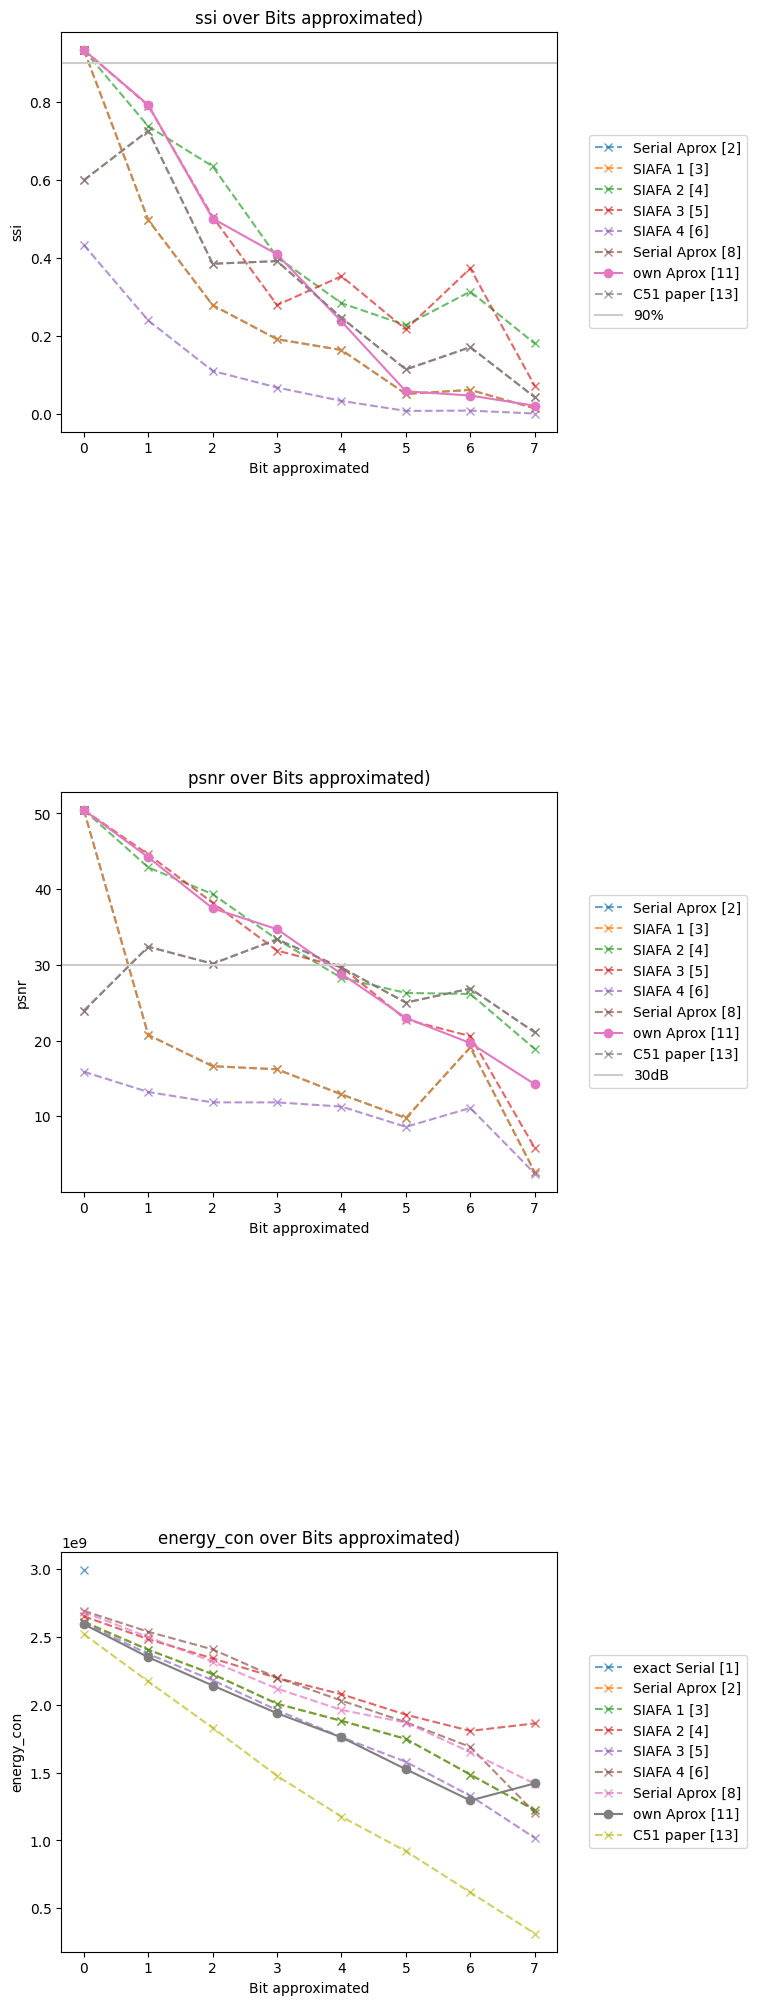

In [14]:
#error metrics list 
algo_list = ["exact Serial [1]","Serial Aprox [2]", "SIAFA 1 [3]","SIAFA 2 [4]","SIAFA 3 [5]","SIAFA 4 [6]","Serial Aprox [8]","own Aprox [11]", "C51 paper [13]"]
metrics_list = ["ssi", "psnr", "energy_con"]
rows = len(metrics_list)
coll = 1

fig, axs = plt.subplots(rows, coll )
plt.subplots_adjust(left=0.125, bottom=6, right=0.9, top=10, wspace=1, hspace=0.9)

#blurring
# loop throw all Bitpositions 
for indexMetric, metric in enumerate(metrics_list):

    for indexalgo, algo in enumerate(algo_list):
        if 'own' in algo:
            axs[indexMetric].plot(loadedDict[kernel][algo][metric], "o-", label=algo)
        else:
            if metric == 'energy_con' or 'exact' not in algo:
                axs[indexMetric].plot(loadedDict[kernel][algo][metric], "x--", label=algo, alpha=0.7)

    if "ssi" in metric:
        axs[indexMetric].axhline(y=0.9, color='0.8', linestyle='-', label='90%')
    if "psnr" in metric:
        axs[indexMetric].axhline(y=30, color='0.8', linestyle='-', label='30dB')

    axs[indexMetric].set_title(f"{metric} over Bits approximated)")
    axs[indexMetric].set_xlabel("Bit approximated")
    axs[indexMetric].set_ylabel(f'{metric}')
    # axs[indexMetric].legend()
    axs[indexMetric].legend(bbox_to_anchor=(1.05, 0.5), loc='center left')

# plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()